# 灰度腐蚀与膨胀

图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，主要用来寻找图像中的极大区域和极小区域。已知有如下的灰度图像A和结构元素B

In [6]:
#矩阵处理库
import numpy as np
#定义待处理的灰度图像A
data=[]
A=list(range(1,7))
for i in range(6):
    data.append(A.copy())
    A.insert(len(A),A[0])
    A.remove(A[0])
A=np.array(data,dtype='int')
#定义结构元素B
B=np.array([[0,1,0],[1,2,1],[0,1,0]],dtype=int)
print("A=\n",A,"\nB=\n",B)

A=
 [[1 2 3 4 5 6]
 [2 3 4 5 6 1]
 [3 4 5 6 1 2]
 [4 5 6 1 2 3]
 [5 6 1 2 3 4]
 [6 1 2 3 4 5]] 
B=
 [[0 1 0]
 [1 2 1]
 [0 1 0]]


## 灰度腐蚀

计算进行腐蚀运算后的图像

$$
(f\ominus b)(s,t)=min \{
    f(s+x,t+y)-b(x,y)|
    (s+x,t+y)\in D_f;(x,y)\in D_b\}
$$

In [7]:
def erose(A,B,center):
    result=np.zeros(A.shape)
    for i in range(center[0],A.shape[0]-(B.shape[0]-center[0])+1):
        for j in range(center[1],A.shape[1]-(B.shape[1]-center[1])+1):
            i1=i-center[0];i2=i-center[0]+B.shape[0]
            j1=j-center[1];j2=j-center[1]+B.shape[1]
            r=A[i1:i2,j1:j2]-B
            result[i,j]=r.min()
    return result[1:-1,1:-1]
A_Erosed=erose(A,B,(1,1))
def erose2(A,B,center):
    result=np.zeros(A.shape)
    for i in range(center[0],A.shape[0]-(B.shape[0]-center[0])+1):
        for j in range(center[1],A.shape[1]-(B.shape[1]-center[1])+1):
            i1=i-center[0];i2=i-center[0]+B.shape[0]
            j1=j-center[1];j2=j-center[1]+B.shape[1]
            r=A[i1:i2,j1:j2]-B
            result[i,j]=r.min()
    return result[1:-1,1:-1]
A_Erosed=erose(A,B,(1,1))
print(A_Erosed)

[[ 1.  2.  1.  0.]
 [ 2.  1.  0. -1.]
 [ 1.  0. -1.  0.]
 [ 0. -1.  0.  1.]]


计算进行膨胀运算后的图像

$$
(f\oplus b)(s,t)=max \{
    f(s-x,t-y)+b(x,y)|
    (s-x,t-y)\in D_f;(x,y)\in D_b\}
$$

In [8]:
def dilate(A,B,center):
    result=np.zeros(A.shape)
    for i in range(center[0],A.shape[0]-(B.shape[0]-center[0])+1):
        for j in range(center[1],A.shape[1]-(B.shape[1]-center[1])+1):
            i1=i-center[0];i2=i-center[0]+B.shape[0]
            j1=j-center[1];j2=j-center[1]+B.shape[1]
            r=A[i1:i2,j1:j2]+B
            result[i,j]=r.max()
    return result[1:-1,1:-1]
A_Dilated=dilate(A,B,(1,1)).astype(int)
print(A_Dilated)

[[5 6 7 8]
 [6 7 8 7]
 [7 8 7 6]
 [8 7 6 5]]


## 使用matplot绘图

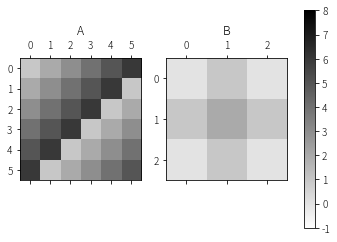

In [9]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,2)
im=axes[0].matshow(A, cmap = plt.cm.gray_r,vmin=-1,vmax=8)
axes[0].title.set_text('A')
im=axes[1].matshow(B, cmap = plt.cm.gray_r,vmin=-1,vmax=8)
axes[1].title.set_text('B')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()


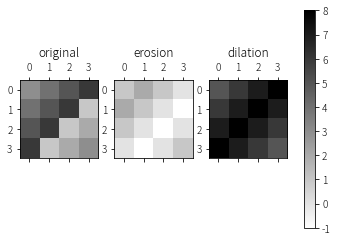

In [10]:
fig,axes=plt.subplots(1,3)

im=axes[0].matshow(A[1:-1,1:-1], cmap = plt.cm.gray_r,vmin=-1,vmax=8)
axes[0].title.set_text('original')
im=axes[1].matshow(A_Erosed, cmap = plt.cm.gray_r,vmin=-1,vmax=8)
axes[1].title.set_text('erosion')
im=axes[2].matshow(A_Dilated,cmap = plt.cm.gray_r,vmin=-1,vmax=8)
axes[2].title.set_text('dilation')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()